<a href="https://colab.research.google.com/github/Ange-mar06/MINI_PROJECT/blob/main/Mini_Project_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**IMAGE PREPROCESSING(Denoising)**

In [ ]:
import cv2
import os

path = '/content/drive/MyDrive/head_ct_1'
output_path = '/content/drive/MyDrive/denoised_images'
if not os.path.exists(output_path):
    os.makedirs(output_path)

for file in os.listdir(path):
    if file.endswith('.png'):
        img = cv2.imread(os.path.join(path, file))
        img_denoised = cv2.fastNlMeansDenoisingColored(img, None, 10, 10, 7, 21)
        output_file = os.path.join(output_path, 'denoised_' + file)  # New output filename
        cv2.imwrite(output_file, img_denoised)  # Save the denoised image

**IMAGE PREPROCESSING(Enhancement)**

In [ ]:
import cv2
import os

path = '/content/drive/MyDrive/denoised_images'
output_path = '/content/drive/MyDrive/head_ct_1_equalized'
if not os.path.exists(output_path):
    os.makedirs(output_path)
for file in os.listdir(path):
    if file.endswith('.png'):
        img = cv2.imread(os.path.join(path, file), cv2.IMREAD_GRAYSCALE)
        img_equalized = cv2.equalizeHist(img)
        cv2.imwrite(os.path.join(output_path, 'equalized_'+file), img_equalized)

**IMAGE PREPROCESSING(Thresholding)**

In [ ]:
import cv2
import os

path = '/content/drive/MyDrive/head_ct_1_equalized'
output_path = '/content/drive/MyDrive/head_ct_1_thresh'

if not os.path.exists(output_path):
    os.makedirs(output_path)

for file in os.listdir(path):
    if file.endswith('.png'):
      #function with a threshold value of 127.
      #any pixel value greater than 127 is set to white (255), while any value less than or equal to 127 is set to black (0).
        img = cv2.imread(os.path.join(path, file), cv2.IMREAD_GRAYSCALE)
        _, img_thresh = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)
        output_file = os.path.join(output_path, file)
        cv2.imwrite(output_file, img_thresh)

**FEATURE EXTRACTION(Gabor)**

In [ ]:
import cv2
import os
import glob
import numpy as np
import matplotlib.pyplot as plt

import time
import csv

tic=time.time()

#Importing the images
img_dir = "/content/drive/MyDrive/head_ct_1_thresh" # Enter Directory where all the images are stored
data_path = os.path.join(img_dir,'*g')
files = glob.glob(data_path)

eo=len(files)

img = []
for f1 in files:
    data = cv2.imread(f1)
    img.append(data)

gamma=0.5
sigma=0.56
theta_list=[0, np.pi, np.pi/2, np.pi/4] #Angles
phi=0
lamda_list=[2*np.pi/1, 2*np.pi/2, 2*np.pi/3] #wavelengths
num=1

#Creating headings for the csv file
gabor_label=[]
for i in range(50):
    gabor_label.append('Gabor'+str(i+1))

with open('Gabor.csv','a+',newline='') as file:
    writer=csv.writer(file)
    #writer.writerow(gabor_label)

    for i in range(eo):
        img[i] = cv2.cvtColor(img[i] , cv2.COLOR_BGR2GRAY)
        print("For image number"+str(i+1)+'\n')
        local_energy_list=[]
        mean_ampl_list=[]

        for theta in theta_list:
            print("For theta = "+str(theta/np.pi)+"pi\n")

            for lamda in lamda_list:
                kernel=cv2.getGaborKernel((3,3),sigma,theta,lamda,gamma,phi,ktype=cv2.CV_32F)
                fimage = cv2.filter2D(img[i], cv2.CV_8UC3, kernel)

                mean_ampl=np.sum(abs(fimage))
                mean_ampl_list.append(mean_ampl)

                local_energy=np.sum(fimage**2)
                local_energy_list.append(local_energy)

                num+=1
        print('\n\n')
        writer.writerow(local_energy_list+mean_ampl_list)

toc=time.time()
print("Computation time is {} seconds".format(str(toc-tic)))

For image number1

For theta = 0.0pi

For theta = 1.0pi

For theta = 0.5pi

For theta = 0.25pi




For image number2

For theta = 0.0pi

For theta = 1.0pi

For theta = 0.5pi

For theta = 0.25pi




For image number3

For theta = 0.0pi

For theta = 1.0pi

For theta = 0.5pi

For theta = 0.25pi




For image number4

For theta = 0.0pi

For theta = 1.0pi

For theta = 0.5pi

For theta = 0.25pi




For image number5

For theta = 0.0pi

For theta = 1.0pi

For theta = 0.5pi

For theta = 0.25pi




For image number6

For theta = 0.0pi

For theta = 1.0pi

For theta = 0.5pi

For theta = 0.25pi




For image number7

For theta = 0.0pi

For theta = 1.0pi

For theta = 0.5pi

For theta = 0.25pi




For image number8

For theta = 0.0pi

For theta = 1.0pi

For theta = 0.5pi

For theta = 0.25pi




For image number9

For theta = 0.0pi

For theta = 1.0pi

For theta = 0.5pi

For theta = 0.25pi




For image number10

For theta = 0.0pi

For theta = 1.0pi

For theta = 0.5pi

For theta = 0.25pi




For image

In [ ]:
import pandas as pd
df=pd.read_csv('Gabor.csv')
df = np.log(df)
df.head()

,1487564,770383,965532,1487564.1,770383.1,965532.1,1448418,797579,997331,886398,...,61417946,62458878.1,61746681.1,61417946.1,62502912,61795159,61450583,62796072,62041801,61118307
0,14.448850,13.700140,13.980897,14.448850,13.700140,13.980897,14.448427,13.862259,14.102025,13.931807,...,18.213167,18.228884,18.218033,18.213167,18.230883,18.220148,18.214610,18.234110,18.222588,18.208883
1,14.186564,13.407774,13.676687,14.186564,13.407774,13.676687,14.208468,13.611059,13.827136,13.645758,...,17.466079,17.494248,17.474760,17.466079,17.497902,17.478640,17.468791,17.504383,17.483938,17.458650
2,13.792664,13.107367,13.336681,13.792664,13.107367,13.336681,13.749311,13.132334,13.369394,13.271302,...,17.498161,17.515192,17.503535,17.498161,17.516101,17.504696,17.498968,17.521358,17.509254,17.493537
3,14.010437,13.276904,13.516905,14.010437,13.276904,13.516905,14.027768,13.448196,13.646627,13.505526,...,17.492766,17.515331,17.499740,17.492766,17.517940,17.502509,17.494672,17.524135,17.507819,17.486861
4,13.869483,13.073442,13.319636,13.869483,13.073442,13.319636,13.907849,13.425308,13.587163,13.353789,...,17.459467,17.479697,17.465455,17.459467,17.484570,17.470496,17.462922,17.488160,17.473308,17.454812


In [ ]:
df.shape

(199, 24)

**FEATURE EXTRACTION(LBP)**

In [ ]:
#GLCM and LBP
import os
import numpy as np
import pandas as pd
from skimage.io import imread
from skimage.feature import greycomatrix, greycoprops, local_binary_pattern
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import glob

# Define the path of the directory containing the images
dir_path = '/content/drive/MyDrive/head_ct_1_thresh'

# Define the parameters for GLCM and LBP
distances = [1] # Distane from central to surrounding pixels
angles = [0, np.pi/4, np.pi/2, 3*np.pi/4] # gives us the granuality(Size in which the data fields are subdivided)
bins = 10 #no. of bins in histogram

# Create an empty DataFrame to store the feature vectors
features_df = pd.DataFrame(columns=['Image Name', 'Contrast', 'Energy', 'Homogeneity', 'Correlation', 'Entropy', 'GLCM Max', 'GLCM Avg', 'LBP Max', 'LBP Avg'])

# Loop through each image in the directory, extract its features and add them to the DataFrame
for image_name in os.listdir(dir_path):
    image_path = os.path.join(dir_path, image_name)
    image = imread(image_path, as_gray=True)

    # Convert the image to unsigned integer type
    image = (image * 255).astype(np.uint8)
    # Extract GLCM features
    glcm = greycomatrix(image, distances, angles, levels=levels, symmetric=True, normed=True)
    contrast = greycoprops(glcm, 'contrast').mean()
    energy = greycoprops(glcm, 'energy').mean()
    homogeneity = greycoprops(glcm, 'homogeneity').mean()
    correlation = greycoprops(glcm, 'correlation').mean()

    # Extract LBP features
    lbp = local_binary_pattern(image, P=bins, R=1)
    lbp_hist, _ = np.histogram(lbp, density=True, bins=bins, range=(0, bins))
    lbp_max = lbp_hist.max()
    lbp_avg = lbp_hist.mean()
    lbp_energy = np.sum(np.square(lbp_hist))
    lbp_MA=np.mean(np.abs(lbp))

    # Add statistical features
    entropy = -np.sum(glcm * np.log2(glcm + 1e-10))
    glcm_max = np.max(glcm)
    glcm_avg = np.mean(glcm)
    features_df = features_df.append({'Image Name': image_name,
                                      'Contrast': contrast,
                                      'Energy': energy,
                                      'Homogeneity': homogeneity,
                                      'Correlation': correlation,
                                      'Entropy': entropy,
                                      'GLCM Max': glcm_max,
                                      'GLCM Avg': glcm_avg,
                                      'LBP Max': lbp_max,
                                      'LBP Avg': lbp_avg,
                                      'LBP Energy':lbp_energy,
                                      'LBP Mean Amplitude':lbp_MA}, ignore_index=True)


# Normalize the features
scaler = StandardScaler()
normalized_features = scaler.fit_transform(features_df[['Contrast', 'Energy', 'Homogeneity', 'Correlation', 'Entropy', 'GLCM Max', 'GLCM Avg', 'LBP Max', 'LBP Avg']])
normalized_features_df = pd.DataFrame(normalized_features, columns=['Contrast', 'Energy', 'Homogeneity', 'Correlation', 'Entropy', 'GLCM Max', 'GLCM Avg', 'LBP Max', 'LBP Avg'])
features_df.update(normalized_features_df)

# Save the DataFrame to a CSV file
features_df.to_csv('Brain_LBP.csv', index=False)

/usr/local/lib/python3.9/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.9/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.9/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.9/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.9/dist-packages/skimage/fea

In [ ]:
# Use Principal Component Analysis (PCA) to reduce the dimensionality of the feature vectors
pca = PCA(n_components=2)
features_pca = pca.fit_transform(features_df[['Contrast', 'Energy', 'Homogeneity', 'Correlation', 'Entropy', 'GLCM Max', 'GLCM Avg', 'LBP Max', 'LBP Avg','LBP Energy','LBP Mean Amplitude']])
features_df['PCA 1'] = features_pca[:, 0]
features_df['PCA 2'] = features_pca[:, 1]

# Save the DataFrame to a CSV file
features_df.to_csv('Brain_PCA.csv', index=False)

In [ ]:
import os
import cv2

def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder, filename))
        if img is not None:
            images.append(img)
    return images

In [ ]:
path = "/content/drive/MyDrive/head_ct_1_thresh"
images = load_images_from_folder(path)

In [ ]:
import os
def load_images_from_folder(folder):
  images = []
  for filename in os.listdir(folder):
    img = cv2.imread(os.path.join(folder,filename))
    if img is not None:
      images.append(img)
  return images

**FEATURE EXTRACTION(Haralick)**

In [ ]:
import cv2
import numpy as np
import pandas as pd

# Define an empty list to store the features
feature_list = []

# Load the image
for img in images:
    # Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # Compute the co-occurrence matrix
    cooc_mat = np.zeros((256, 256))
    for i in range(gray.shape[0]-1):
        for j in range(gray.shape[1]-1):
            row = gray[i][j]
            col = gray[i][j+1]
            cooc_mat[row][col] += 1
            cooc_mat[col][row] += 1

    # Normalize the co-occurrence matrix
    cooc_mat /= np.sum(cooc_mat)

    # Compute the Haralick features
    feat = np.zeros(13)
    for i in range(256):
        for j in range(256):
            feat[0] += cooc_mat[i][j] * cooc_mat[i][j] #angle second moment
            feat[1] += (i - j) * (i - j) * cooc_mat[i][j]
            feat[2] += cooc_mat[i][j] / (1 + (i - j) * (i - j)) #inverse diff moment
            feat[3] += cooc_mat[i][j] * np.log(cooc_mat[i][j] + 1e-6)
            if i != j:
                feat[4] += cooc_mat[i][j] / (1 + abs(i - j))
                feat[5] += cooc_mat[i][j] * np.log(cooc_mat[i][j] + 1e-6) / np.log(cooc_mat[i][j] + 1e-6)
                feat[6] += (i - cooc_mat.shape[0] / 2) * (i - cooc_mat.shape[0] / 2) * cooc_mat[i][j]
                feat[7] += (j - cooc_mat.shape[1] / 2) * (j - cooc_mat.shape[1] / 2) * cooc_mat[i][j]
                feat[8] += (i - cooc_mat.shape[0] / 2) * (j - cooc_mat.shape[1] / 2) * cooc_mat[i][j]
            feat[9] += cooc_mat[i][j] * (i + j)
            feat[10] += cooc_mat[i][j] * abs(i - j)
            feat[11] = np.max(cooc_mat)
            feat[12] += cooc_mat[i][j] * (i - cooc_mat.shape[0] / 2) * (j - cooc_mat.shape[1] / 2)

    # Append the features to the list
    feature_list.append(feat)

# Convert the feature list to a pandas DataFrame
feature_df = pd.DataFrame(feature_list, columns=['ASM', 'Contrast', 'IDM', 'Entropy', 'Variance',
                                                  'Sum_Average', 'Sum_Variance', 'Sum_Entropy',
                                                  'Diff_Variance', 'Diff_Entropy', 'Max_Probability',
                                                  'Correlation', 'Auto_Correlation'])
# Save the DataFrame to a CSV file
feature_df.to_csv('Haralick.csv', index=False)

In [ ]:
df=pd.read_csv('Haralick.csv')
df.shape

(200, 13)

In [ ]:
df[['Contrast','Variance','Sum_Variance','Sum_Entropy','Diff_Entropy','Auto_Correlation']] = df[['Contrast','Variance','Sum_Variance','Sum_Entropy','Diff_Entropy','Auto_Correlation']].apply(np.log)
df.to_csv('Modified_Haralick.csv', index=False)

**FEATURE EXTRACTION(Hu Moments)**

In [ ]:
import cv2
import pandas as pd
# Create an empty DataFrame to store Hu Moments
dfHuMoments = pd.DataFrame()

# Loop through each image and calculate Hu Moments
for image in images:
    # Convert image to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # Calculate Hu Moments
    hu_moments = cv2.HuMoments(cv2.moments(gray_image)).flatten()
    # Create a dictionary with Hu Moments as values and Moment1 to Moment7 as keys
    row = {"Moment1":hu_moments[0],"Moment2":hu_moments[1],"Moment3":hu_moments[2],"Moment4":hu_moments[3],"Moment5":hu_moments[4],"Moment6":hu_moments[5],"Moment7":hu_moments[6]}
    # Convert the dictionary to a DataFrame
    row_df = pd.DataFrame(row, index=[0])
    # Append the DataFrame to dfHuMoments
    dfHuMoments = pd.concat([dfHuMoments, row_df], axis=0)

# Save dfHuMoments as a CSV file
dfHuMoments.to_csv('HuMoments.csv', index=False)

In [ ]:
dfHuMoments.reset_index()

,index,Moment1,Moment2,Moment3,Moment4,Moment5,Moment6,Moment7
0,0,0.001173,4.957978e-08,1.068518e-11,1.117775e-11,9.097521e-23,1.971062e-15,8.152388e-23
1,0,0.001527,1.409171e-07,9.253872e-13,6.775153e-11,2.547905e-22,1.388517e-14,-4.720965e-22
2,0,0.001782,1.019289e-07,1.469413e-11,6.531433e-11,-1.628997e-21,-1.520407e-14,-1.200238e-21
3,0,0.001229,6.080579e-08,7.355868e-12,1.791928e-11,-1.825190e-22,-7.149317e-16,-9.492987e-23
4,0,0.001602,5.031951e-08,2.131858e-12,1.832783e-10,1.236664e-21,-6.367612e-15,3.405205e-21
...,...,...,...,...,...,...,...,...
195,0,0.001162,7.197291e-08,1.632110e-12,3.031270e-14,9.527049e-28,-8.116111e-18,6.674705e-27
196,0,0.001417,2.251375e-08,1.011015e-11,1.871443e-11,-2.478687e-22,6.228712e-16,-6.947377e-23
197,0,0.001277,4.661145e-08,6.211116e-12,6.891201e-12,-3.180039e-23,1.173551e-15,3.195852e-23
198,0,0.001208,3.933090e-08,3.581464e-12,7.977856e-11,7.265388e-22,7.006919e-15,-1.136075e-21


In [ ]:
dfHuMoments[['Moment2','Moment3','Moment4','Moment5','Moment6','Moment7']] = dfHuMoments[['Moment2','Moment3','Moment4','Moment5','Moment6','Moment7']].apply(np.log)
dfHuMoments.to_csv('Modified_HuMoments.csv', index=False)

**FEATURE EXTRACTION(Tamura)**

In [ ]:
import cv2
import numpy as np
import os
import glob
import time
import pandas as pd

tic = time.time()

def coarseness(image, kmax):
	image = np.array(image)
	w = image.shape[0]
	h = image.shape[1]
	kmax = kmax if (np.power(2,kmax) < w) else int(np.log(w) / np.log(2))
	kmax = kmax if (np.power(2,kmax) < h) else int(np.log(h) / np.log(2))
	average_gray = np.zeros([kmax,w,h])
	horizon = np.zeros([kmax,w,h])
	vertical = np.zeros([kmax,w,h])
	Sbest = np.zeros([w,h])

	for k in range(kmax):
		window = np.power(2,k)
		for wi in range(w)[window:(w-window)]:
			for hi in range(h)[window:(h-window)]:
				average_gray[k][wi][hi] = np.sum(image[wi-window:wi+window, hi-window:hi+window])
		for wi in range(w)[window:(w-window-1)]:
			for hi in range(h)[window:(h-window-1)]:
				horizon[k][wi][hi] = average_gray[k][wi+window][hi] - average_gray[k][wi-window][hi]
				vertical[k][wi][hi] = average_gray[k][wi][hi+window] - average_gray[k][wi][hi-window]
		horizon[k] = horizon[k] * (1.0 / np.power(2, 2*(k+1)))
		vertical[k] = horizon[k] * (1.0 / np.power(2, 2*(k+1)))

	for wi in range(w):
		for hi in range(h):
			h_max = np.max(horizon[:,wi,hi])
			h_max_index = np.argmax(horizon[:,wi,hi])
			v_max = np.max(vertical[:,wi,hi])
			v_max_index = np.argmax(vertical[:,wi,hi])
			index = h_max_index if (h_max > v_max) else v_max_index
			Sbest[wi][hi] = np.power(2,index)

	fcrs = np.mean(Sbest)
	return fcrs


def contrast(image):
	image = np.array(image)
	image = np.reshape(image, (1, image.shape[0]*image.shape[1]))
	m4 = np.mean(np.power(image - np.mean(image),4))
	v = np.var(image)
	std = np.power(v, 0.5)
	alfa4 = m4 / np.power(v,2)
	fcon = std / np.power(alfa4, 0.25)
	return fcon

def directionality(image):
	image = np.array(image, dtype = 'int64')
	h = image.shape[0]
	w = image.shape[1]
	convH = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])
	convV = np.array([[1,1,1],[0,0,0],[-1,-1,-1]])
	deltaH = np.zeros([h,w])
	deltaV = np.zeros([h,w])
	theta = np.zeros([h,w])

	# calc for deltaH
	for hi in range(h)[1:h-1]:
		for wi in range(w)[1:w-1]:
			deltaH[hi][wi] = np.sum(np.multiply(image[hi-1:hi+2, wi-1:wi+2], convH))
	for wi in range(w)[1:w-1]:
		deltaH[0][wi] = image[0][wi+1] - image[0][wi]
		deltaH[h-1][wi] = image[h-1][wi+1] - image[h-1][wi]
	for hi in range(h):
		deltaH[hi][0] = image[hi][1] - image[hi][0]
		deltaH[hi][w-1] = image[hi][w-1] - image[hi][w-2]

	# calc for deltaV
	for hi in range(h)[1:h-1]:
		for wi in range(w)[1:w-1]:
			deltaV[hi][wi] = np.sum(np.multiply(image[hi-1:hi+2, wi-1:wi+2], convV))
	for wi in range(w):
		deltaV[0][wi] = image[1][wi] - image[0][wi]
		deltaV[h-1][wi] = image[h-1][wi] - image[h-2][wi]
	for hi in range(h)[1:h-1]:
		deltaV[hi][0] = image[hi+1][0] - image[hi][0]
		deltaV[hi][w-1] = image[hi+1][w-1] - image[hi][w-1]

	deltaG = (np.absolute(deltaH) + np.absolute(deltaV)) / 2.0
	deltaG_vec = np.reshape(deltaG, (deltaG.shape[0] * deltaG.shape[1]))

	# calc the theta
	for hi in range(h):
		for wi in range(w):
			if (deltaH[hi][wi] == 0 and deltaV[hi][wi] == 0):
				theta[hi][wi] = 0;
			elif(deltaH[hi][wi] == 0):
				theta[hi][wi] = np.pi
			else:
				theta[hi][wi] = np.arctan(deltaV[hi][wi] / deltaH[hi][wi]) + np.pi / 2.0
	theta_vec = np.reshape(theta, (theta.shape[0] * theta.shape[1]))

	n = 16
	t = 12
	cnt = 0
	hd = np.zeros(n)
	dlen = deltaG_vec.shape[0]
	for ni in range(n):
		for k in range(dlen):
			if((deltaG_vec[k] >= t) and (theta_vec[k] >= (2*ni-1) * np.pi / (2 * n)) and (theta_vec[k] < (2*ni+1) * np.pi / (2 * n))):
				hd[ni] += 1
	hd = hd / np.mean(hd)
	hd_max_index = np.argmax(hd)
	fdir = 0
	for ni in range(n):
		fdir += np.power((ni - hd_max_index), 2) * hd[ni]
	return fdir

def roughness(fcrs, fcon):
	return fcrs + fcon

def regularity(image):
    image = np.array(image)
    w = image.shape[0]
    h = image.shape[1]
    S = 0.0
    for wi in range(w)[1:w-1]:
        for hi in range(h)[1:h-1]:
            neigborhood = image[wi-1:wi+2, hi-1:hi+2]
            average_gray = np.mean(neigborhood)
            S += np.power(image[wi][hi] - average_gray, 2)
    freg = np.power(S / (w*h), 0.5)
    return freg

def likeness(image):
    image = np.array(image)
    w = image.shape[0]
    h = image.shape[1]
    M = np.mean(image)
    L = np.power((np.sum(np.power((image[0:w-1,0:h-1] - M),2)) / (w*h)), 0.5)
    S = np.sum(np.absolute(image[0:w-1,0:h-1] - M)) / (w*h*L)
    return S


if __name__ == '__main__':

        # load the training dataset
  train_path  = "/content/drive/MyDrive/head_ct_1_thresh"
  train_names = os.listdir(train_path)

        # loop over the training dataset
  cur_path = os.path.join(train_path, '*g')
  cur_label = train_names
  i = 0
  for file in glob.glob(cur_path):
          print('For image {} named {}:'.format(i+1,cur_label[i]))
          img = cv2.imread(file)
          img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
          print('Shape of image is: {} '.format(img.shape))
          fcrs = coarseness(img, 5)
          print("Coarseness: %f" % fcrs);
          fcon = contrast(img)
          print("Contrast: %f" % fcon)
          fdir= directionality(img)
          print("Directionality: %f" % fdir)
          f_r=roughness(fcrs,fcon)
          print("Roughness: %f" % f_r)
          freg=regularity(img)
          print("Regularity: %f" % freg)
          s=likeness(img)
          print("Line-Likeness: %f" % s)
          print('\n\n')
          i+=1

toc = time.time()
print("Computation time is {} minutes".format((toc-tic)/60))

For image 1 named equalized_denoised_001.png:
Shape of image is: (768, 622) 
Coarseness: 5.923529
Contrast: 127.499902
Directionality: 488.019391
Roughness: 133.423431
Regularity: 16.983703
Line-Likeness: 0.998545



For image 2 named equalized_denoised_000.png:
Shape of image is: (957, 821) 
Coarseness: 5.360642
Contrast: 120.593835
Directionality: 443.266821
Roughness: 125.954476
Regularity: 14.729294
Line-Likeness: 0.979831



For image 3 named equalized_denoised_002.png:
Shape of image is: (725, 662) 
Coarseness: 5.584003
Contrast: 103.817331
Directionality: 469.758954
Roughness: 109.401334
Regularity: 17.618446
Line-Likeness: 0.924212



For image 4 named equalized_denoised_014.png:
Shape of image is: (612, 505) 
Coarseness: 6.434123
Contrast: 127.499752
Directionality: 458.174124
Roughness: 133.933875
Regularity: 16.977173
Line-Likeness: 0.998192



For image 5 named equalized_denoised_003.png:
Shape of image is: (708, 614) 
Coarseness: 5.670702
Contrast: 112.497787
Directionalit

**FEATURE SELECTION(Principal Component Analysis)**

In [ ]:
import pandas as pd
import numpy as np
D1=pd.read_csv("DataSet.csv")

In [ ]:
D11=D1.drop(['Image Name','Variance'],axis=1) #if u want to drop multiple columns in pandas
D11.head()

,Contrast,Energy,Homogeneity,Correlation,Entropy,GLCM Max,GLCM Avg,LBP Max,LBP Avg,LBP Energy,...,mean amplitude 10,mean amplitude 11,mean amplitude 12,Moment1,Moment2,Moment3,Moment4,Moment5,Moment6,Moment7
0,-0.765363,-0.305438,0.765363,0.797136,-0.338127,-1.055310,0.0,0.339257,0,0.861837,...,62796072,62041801,61118307,0.001173,-16.819683,-25.262163,-25.217096,-50.751455,-33.860204,-50.861146
1,-1.209891,0.843207,1.209891,1.166896,-1.392159,0.815503,0.0,0.613398,0,0.928126,...,82979967,82029406,80912818,0.001527,-15.775094,-27.708564,-23.415174,-49.721601,-31.907955,NaN
2,-0.629935,3.227272,0.629935,0.358952,-2.441964,2.544565,0.0,0.511989,0,0.903346,...,39999736,39190217,38211627,0.001782,-16.098991,-24.943573,-23.451810,0.000000,0.000000,0.000000
3,-0.746682,-0.313199,0.746682,0.779441,-0.318888,-1.050465,0.0,0.835172,0,0.984775,...,40684521,40195047,39568240,0.001229,-16.615581,-25.635523,-24.745144,0.000000,0.000000,0.000000
4,-0.819943,1.895050,0.819943,0.691434,-1.724243,1.740071,0.0,0.514714,0,0.903822,...,40797634,40137399,39304948,0.001602,-16.804873,-26.874027,-22.420015,-48.141869,0.000000,-47.128982


In [ ]:
D11=D11.dropna(axis=1)

In [ ]:
D11.shape

(200, 52)

In [ ]:
from sklearn.preprocessing import StandardScaler
X=D11
sc=StandardScaler()
X_scaled=sc.fit_transform(X)

In [ ]:
from sklearn.decomposition import PCA
pca=PCA(n_components=4)
pca.fit(X_scaled)

PCA(n_components=4)

In [ ]:
print("Eigenvalues")
print(pca.explained_variance_)
print()
print('eigen vectors')
print(pca.components_)

Eigenvalues
[27.25851141 10.88943673  5.48696875  1.6466514 ]

eigen vectors
[[-1.24242162e-01 -1.18600879e-02  1.24242162e-01  1.29014411e-01
  -7.32021558e-02 -6.83127068e-02  1.37456990e-03  9.77808373e-02
   2.58493941e-26  9.54924302e-02  1.20968320e-01 -1.67866952e-02
  -1.28483010e-01  1.25173698e-01  7.30894338e-02 -1.25173699e-01
  -1.28178130e-01 -1.28178130e-01  1.25173699e-01  6.89844638e-02
  -1.25173699e-01 -6.66368637e-02  1.21403334e-01  1.67649492e-01
   1.71286931e-01  1.71180541e-01  1.67649492e-01  1.71286931e-01
   1.71180541e-01  1.67113058e-01  1.65571989e-01  1.65571989e-01
   1.70368594e-01  1.69235803e-01  1.64913488e-01  1.87917399e-01
   1.87958400e-01  1.87973687e-01  1.87917399e-01  1.87958400e-01
   1.87973687e-01  1.87895271e-01  1.87936064e-01  1.87960601e-01
   1.87892651e-01  1.87934878e-01  1.87983046e-01 -4.31427321e-02
   8.16583063e-03 -2.57870880e-03 -1.76119797e-02  1.32154290e-02]
 [ 2.25101472e-01 -1.64252833e-01 -2.25101472e-01 -2.08217563e-0

In [ ]:
transformed_df=pd.DataFrame(pca.transform(X_scaled),columns=['PC1','PC2','PC3','PC4'])
transformed_df.to_csv("DataSettransformered.csv",index=False)

In [ ]:
transformed_df

,PC1,PC2,PC3,PC4
0,14.384208,3.795203,1.276285,-0.282349
1,20.583762,3.595110,5.661490,-0.373791
2,9.106718,-0.227576,8.829923,1.066145
3,7.379373,0.453704,-0.745531,0.128558
4,8.447433,-0.674526,5.570539,0.988592
...,...,...,...,...
195,1.775474,-2.549745,-2.836493,2.034668
196,-1.501460,-6.587080,-0.104318,0.518512
197,4.937038,3.800450,1.622244,0.055804
198,8.173978,-0.433341,-0.179483,-0.604383


In [ ]:
D11.describe()

,Contrast,Energy,Homogeneity,Correlation,Entropy,GLCM Max,GLCM Avg,LBP Max,LBP Avg,LBP Energy,...,mean amplitude 8,mean amplitude 9,mean amplitude 10,mean amplitude 11,mean amplitude 12,Moment1,Moment2,Moment3,Moment4,Moment6
count,2.000000e+02,2.000000e+02,2.000000e+02,2.000000e+02,2.000000e+02,2.000000e+02,2.000000e+02,2.000000e+02,200.0,200.000000,...,2.000000e+02,2.000000e+02,2.000000e+02,2.000000e+02,2.000000e+02,200.000000,200.000000,200.000000,200.000000,200.000000
mean,-2.499997e-11,2.000001e-11,2.499997e-11,5.000000e-12,-2.500000e-11,3.500002e-11,1.300000e-02,2.500000e-11,0.0,0.815652,...,2.025405e+07,2.009594e+07,2.067816e+07,2.034863e+07,1.993831e+07,0.001292,-16.929930,-25.883091,-24.331206,-26.116736
std,1.002509e+00,1.002509e+00,1.002509e+00,1.002509e+00,1.002509e+00,1.002509e+00,1.300599e-01,1.002509e+00,0.0,0.176642,...,1.318203e+07,1.311358e+07,1.336932e+07,1.322260e+07,1.304453e+07,0.000235,1.213362,1.739285,1.647511,13.410187
min,-1.598765e+00,-3.042995e+00,-5.972726e+00,-5.585948e+00,-3.330459e+00,-1.287678e+00,-3.390000e-21,-3.447844e+00,0.0,0.361488,...,1.275273e+06,1.236952e+06,1.351399e+06,1.284675e+06,1.198769e+06,0.000719,-21.802418,-31.177674,-31.127210,-37.627830
25%,-6.776028e-01,-5.449862e-01,-3.040352e-01,-3.534223e-01,-5.833234e-01,-9.161332e-01,0.000000e+00,-5.009317e-01,0.0,0.688783,...,9.027747e+06,8.922604e+06,9.258418e+06,9.074516e+06,8.817614e+06,0.001097,-17.418937,-26.966856,-25.340666,-33.860647
50%,-2.030755e-01,-1.861996e-01,2.030755e-01,2.398623e-01,-1.020412e-01,-1.773957e-02,0.000000e+00,4.190049e-01,0.0,0.880724,...,1.726905e+07,1.712261e+07,1.768757e+07,1.736790e+07,1.697332e+07,0.001290,-16.711636,-25.836474,-24.170771,-32.029072
75%,3.040352e-01,2.598231e-01,6.776028e-01,6.560392e-01,4.761176e-01,6.014861e-01,0.000000e+00,7.633052e-01,0.0,0.966154,...,2.928228e+07,2.906617e+07,2.981991e+07,2.942063e+07,2.885408e+07,0.001471,-16.174167,-24.685957,-23.102251,-30.084244
max,5.972726e+00,5.359307e+00,1.598765e+00,1.586179e+00,5.012450e+00,3.687715e+00,1.400000e+00,8.930401e-01,0.0,1.000000,...,8.182945e+07,8.137752e+07,8.297997e+07,8.202941e+07,8.091282e+07,0.001884,-14.266979,-22.076175,-21.342623,0.000000


**PROPOSED ISSA**

In [ ]:
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
import numpy as np

def objective_function(X, y, C):
    """
    X: feature matrix
    y: target vector
    C: regularization strength parameter for logistic regression
    """
    clf = LogisticRegression(penalty='l1', solver='liblinear', C=C, max_iter=1000)
    # Perform 5-fold cross-validation
    scores = cross_val_score(clf, X, y, cv=5)
    # Compute the average cross-validated accuracy
    accuracy = np.mean(scores)
    # Compute the number of selected features
    n_features = np.sum(clf.fit(X, y).coef_ != 0)
    # Define the objective function as a weighted sum of the number of features and the accuracy
    objective = n_features + (1 - accuracy)
    return objective

def ISSA():
# evaluate fitness of initial population
  fitness = scores(pop, X, y)
  # initialize SA with the best individual from initial population
  Xsa = pop[np.argmax(fitness)]
  fsa = np.max(fitness)
  # initialize MFEA with the initial population
  Xmfea = pop
  fmfea = fitness
  # initialize ISSA with the initial population
  Xissa = pop
  fissa = fitness
  t = 1  # current generation
  while t <= Ngen:
      # combine ISSA, MFEA, and SA algorithms for feature selection
      # run ISSA algorithm
      Xissa, fissa = issa_algorithm(Xissa, fissa, X, y)

      # run MFEA algorithm
      Xmfea, fmfea = mfea_algorithm(Xmfea, fmfea, X, y, pc, pm)

      # run SA algorithm
      Xsa, fsa = sa_algorithm(Xsa, fsa, X, y, T, alpha, Tf, L)
      T = T * alpha  # update temperature for SA

      # select best solution from ISSA, MFEA, and SA
      solutions = np.vstack((Xissa, Xmfea, Xsa))
      fitness = np.concatenate((fissa, fmfea, fsa))
      best_idx = np.argmax(fitness)
      Xbest = solutions[best_idx]
      fgbest = fitness[best_idx]
      t += 1
# Initialize ISSA parameters
n_pop = 50 # population size
n_dim = 10 # number of dimensions
max_iter = 100 # maximum number of iterations
lb = -5 # lower bound of search space
ub = 5 # upper bound of search space
w = 0.5
c1 = 1 # alpha
c2 = 1 # beta

# Initialize population and velocities
population = np.random.uniform(lb, ub, size=(n_pop, n_dim))
velocities = np.zeros_like(population)

# Initialize global best position and fitness
gbest_position = None
gbest_fitness = np.inf

# Main optimization loop
for iter in range(max_iter):
    # Evaluate fitness of each individual
    fitness = np.array([objective_function(x) for x in population])

    # Update global best position and fitness
    best_idx = np.argmin(fitness)
    if fitness[best_idx] < gbest_fitness:
        gbest_position = population[best_idx]
        gbest_fitness = fitness[best_idx]

    # Update velocities and positions of individuals
    for i in range(n_pop):
        # Update velocity
        velocities[i] = w * velocities[i] + c1 * np.random.rand(n_dim) * (population[i] - population[i]) + \
                         c2 * np.random.rand(n_dim) * (gbest_position - population[i])

        # Update position
        population[i] += velocities[i]

        # Apply bounds
        population[i] = np.clip(population[i], lb, ub)

    # Print current iteration and best fitness
    print("Iteration: {:d}, Best Fitness: {:.4f}".format(iter+1, gbest_fitness))

# Print final results
print("Optimization completed!")
print("Global Best Fitness: {:.4f}".format(gbest_fitness))
print("Global Best Position: ", gbest_position)

Iteration: 1, Best Fitness: 25.9260
Iteration: 2, Best Fitness: 12.4129
Iteration: 3, Best Fitness: 8.8539
Iteration: 4, Best Fitness: 8.5839
Iteration: 5, Best Fitness: 8.5839
Iteration: 6, Best Fitness: 8.5839
Iteration: 7, Best Fitness: 8.5839
Iteration: 8, Best Fitness: 8.5839
Iteration: 9, Best Fitness: 8.5839
Iteration: 10, Best Fitness: 8.5839
Iteration: 11, Best Fitness: 8.5839
Iteration: 12, Best Fitness: 8.5839
Iteration: 13, Best Fitness: 8.5839
Iteration: 14, Best Fitness: 8.5839
Iteration: 15, Best Fitness: 8.5839
Iteration: 16, Best Fitness: 8.5839
Iteration: 17, Best Fitness: 8.5839
Iteration: 18, Best Fitness: 8.5839
Iteration: 19, Best Fitness: 8.5839
Iteration: 20, Best Fitness: 8.5839
Iteration: 21, Best Fitness: 8.5839
Iteration: 22, Best Fitness: 8.5839
Iteration: 23, Best Fitness: 8.5839
Iteration: 24, Best Fitness: 8.5839
Iteration: 25, Best Fitness: 8.5839
Iteration: 26, Best Fitness: 8.5839
Iteration: 27, Best Fitness: 8.5839
Iteration: 28, Best Fitness: 8.5839

**CLASSIFICATION ALGORITHMS(K-Nearest Neighbours)**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

In [ ]:
df = pd.read_csv('DataSet.csv')
df=df.drop('Image Name',axis=1)
df=df.dropna()

In [ ]:
df.head()

,Labels,Contrast,Energy,Homogeneity,Correlation,Entropy,LBP Energy,LBP Mean Amplitude,ASM,Contrast.1,...,mean amplitude 10,mean amplitude 11,mean amplitude 12,Moment1,Moment2,Moment3,Moment4,Moment5,Moment6,Moment7
0,1,-0.765363,-0.305438,0.765363,0.797136,-0.338127,0.861837,1010.195934,0.487126,0.646366,...,62796072,62041801,61118307,0.001173,-16.819683,-25.262163,-25.217096,-50.751455,-33.860204,-50.861146
1,1,-1.209891,0.843207,1.209891,1.166896,-1.392159,0.928126,1013.076106,0.508188,0.628694,...,82979967,82029406,80912818,0.001527,-15.775094,-27.708564,-23.415174,-49.721601,-31.907955,0.000000
2,1,-0.629935,3.227272,0.629935,0.358952,-2.441964,0.903346,1009.379756,0.556538,0.655374,...,39999736,39190217,38211627,0.001782,-16.098991,-24.943573,-23.451810,0.000000,0.000000,0.000000
3,1,-0.746682,-0.313199,0.746682,0.779441,-0.318888,0.984775,1009.839934,0.486899,0.647766,...,40684521,40195047,39568240,0.001229,-16.615581,-25.635523,-24.745144,0.000000,0.000000,0.000000
4,1,-0.819943,1.895050,0.819943,0.691434,-1.724243,0.903822,1010.702279,0.529522,0.646941,...,40797634,40137399,39304948,0.001602,-16.804873,-26.874027,-22.420015,-48.141869,0.000000,-47.128982


In [ ]:
df.describe()

,Labels,Contrast,Energy,Homogeneity,Correlation,Entropy,LBP Energy,LBP Mean Amplitude,ASM,Contrast.1,...,mean amplitude 10,mean amplitude 11,mean amplitude 12,Moment1,Moment2,Moment3,Moment4,Moment5,Moment6,Moment7
count,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,...,1.970000e+02,1.970000e+02,1.970000e+02,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000
mean,0.492386,-0.005361,0.004946,0.005361,0.004768,-0.006980,0.815187,1004.711467,0.493172,0.670376,...,2.065080e+07,2.032242e+07,1.991347e+07,0.001291,-16.919978,-25.878120,-24.333888,-33.249545,-26.007280,-21.548011
std,0.501216,1.003867,1.007759,1.003867,1.004399,1.004381,0.177483,7.209906,0.019295,0.024440,...,1.338273e+07,1.323645e+07,1.305882e+07,0.000236,1.215535,1.732796,1.659299,23.283051,13.482350,25.121933
min,0.000000,-1.598765,-3.042995,-5.972726,-5.585948,-3.330459,0.361488,954.404943,0.439195,0.606822,...,1.351399e+06,1.284675e+06,1.198769e+06,0.000719,-21.802418,-31.177674,-31.127210,-62.218248,-37.627830,-60.271473
25%,0.000000,-0.690116,-0.535275,-0.304035,-0.352219,-0.583878,0.682199,1002.888099,0.482354,0.654174,...,9.275059e+06,9.108929e+06,8.865430e+06,0.001095,-17.416729,-26.964718,-25.344939,-50.098098,-33.860204,-49.872360
50%,0.000000,-0.203150,-0.184394,0.203150,0.242097,-0.110411,0.881560,1006.282596,0.488932,0.670378,...,1.768022e+07,1.736281e+07,1.695721e+07,0.001287,-16.670120,-25.830202,-24.181556,-46.578485,-31.980661,0.000000
75%,1.000000,0.304035,0.259687,0.690116,0.664497,0.474744,0.969653,1009.379756,0.497665,0.685425,...,2.981883e+07,2.941914e+07,2.884000e+07,0.001469,-16.150292,-24.692918,-23.093007,0.000000,-30.084244,0.000000
max,1.000000,5.972726,5.359307,1.598765,1.586179,5.012450,1.000000,1016.019826,0.598141,0.752731,...,8.297997e+07,8.202941e+07,8.091282e+07,0.001884,-14.266979,-22.076175,-21.342623,0.000000,0.000000,0.000000


In [ ]:
X = df.drop('Labels', axis=1) # drop the target column from features
y = df['Labels']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

In [ ]:
print(len(X_train))
print(len(X_test))
print(len(y_train))
print(len(y_test))

157
40
157
40


In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)

In [ ]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
y_pred = knn.predict(X_test)

In [ ]:
  y_pred

array([0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0])

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.625


<Axes: xlabel='mean amplitude 9', ylabel='Labels'>

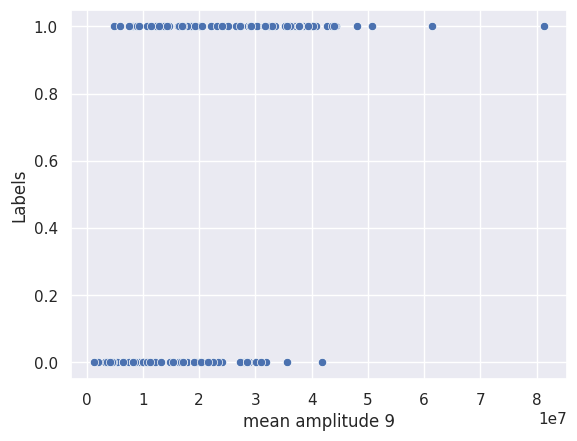

In [ ]:
  import seaborn as sns
  sns.set()
  sns.scatterplot(
      x = df['mean amplitude 9'] ,# drop the target column from features
      y = df['Labels'],
      data=X_test.join(y_test, how='outer')
  )

<ipython-input-267-183898dc80c6>:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


<Axes: >

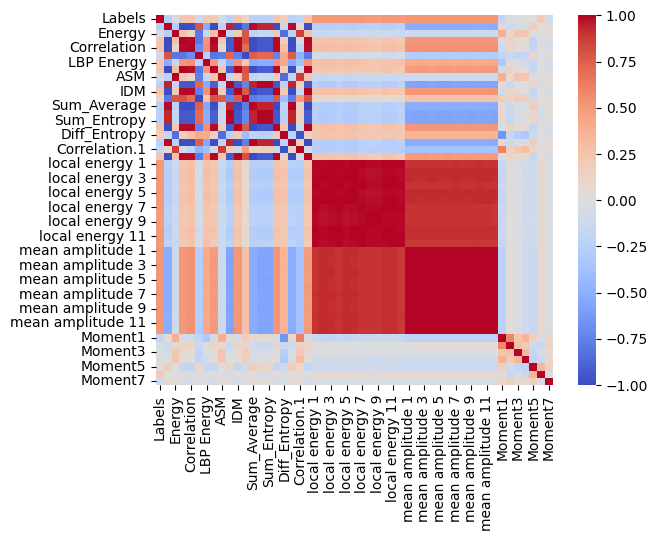

In [ ]:
import pandas as pd
import seaborn as sns
# Load the dataset
df = pd.read_csv('DataSet.csv')
# Compute the correlation matrix
corr = df.corr()
# Plot the correlation matrix as a heatmap
sns.heatmap(corr, cmap='coolwarm')

In [ ]:
import matplotlib.pyplot as plt
k_values = range(1, 31)
train_acc = []
test_acc = []
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_acc.append(knn.score(X_train, y_train))
    test_acc.append(knn.score(X_test, y_test))

# Plot accuracy curves
plt.plot(k_values, train_acc, label='Training Accuracy')
plt.plot(k_values, test_acc, label='Testing Accuracy')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.legend()
plt.show()